In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [67]:
df.columns

Index(['index', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

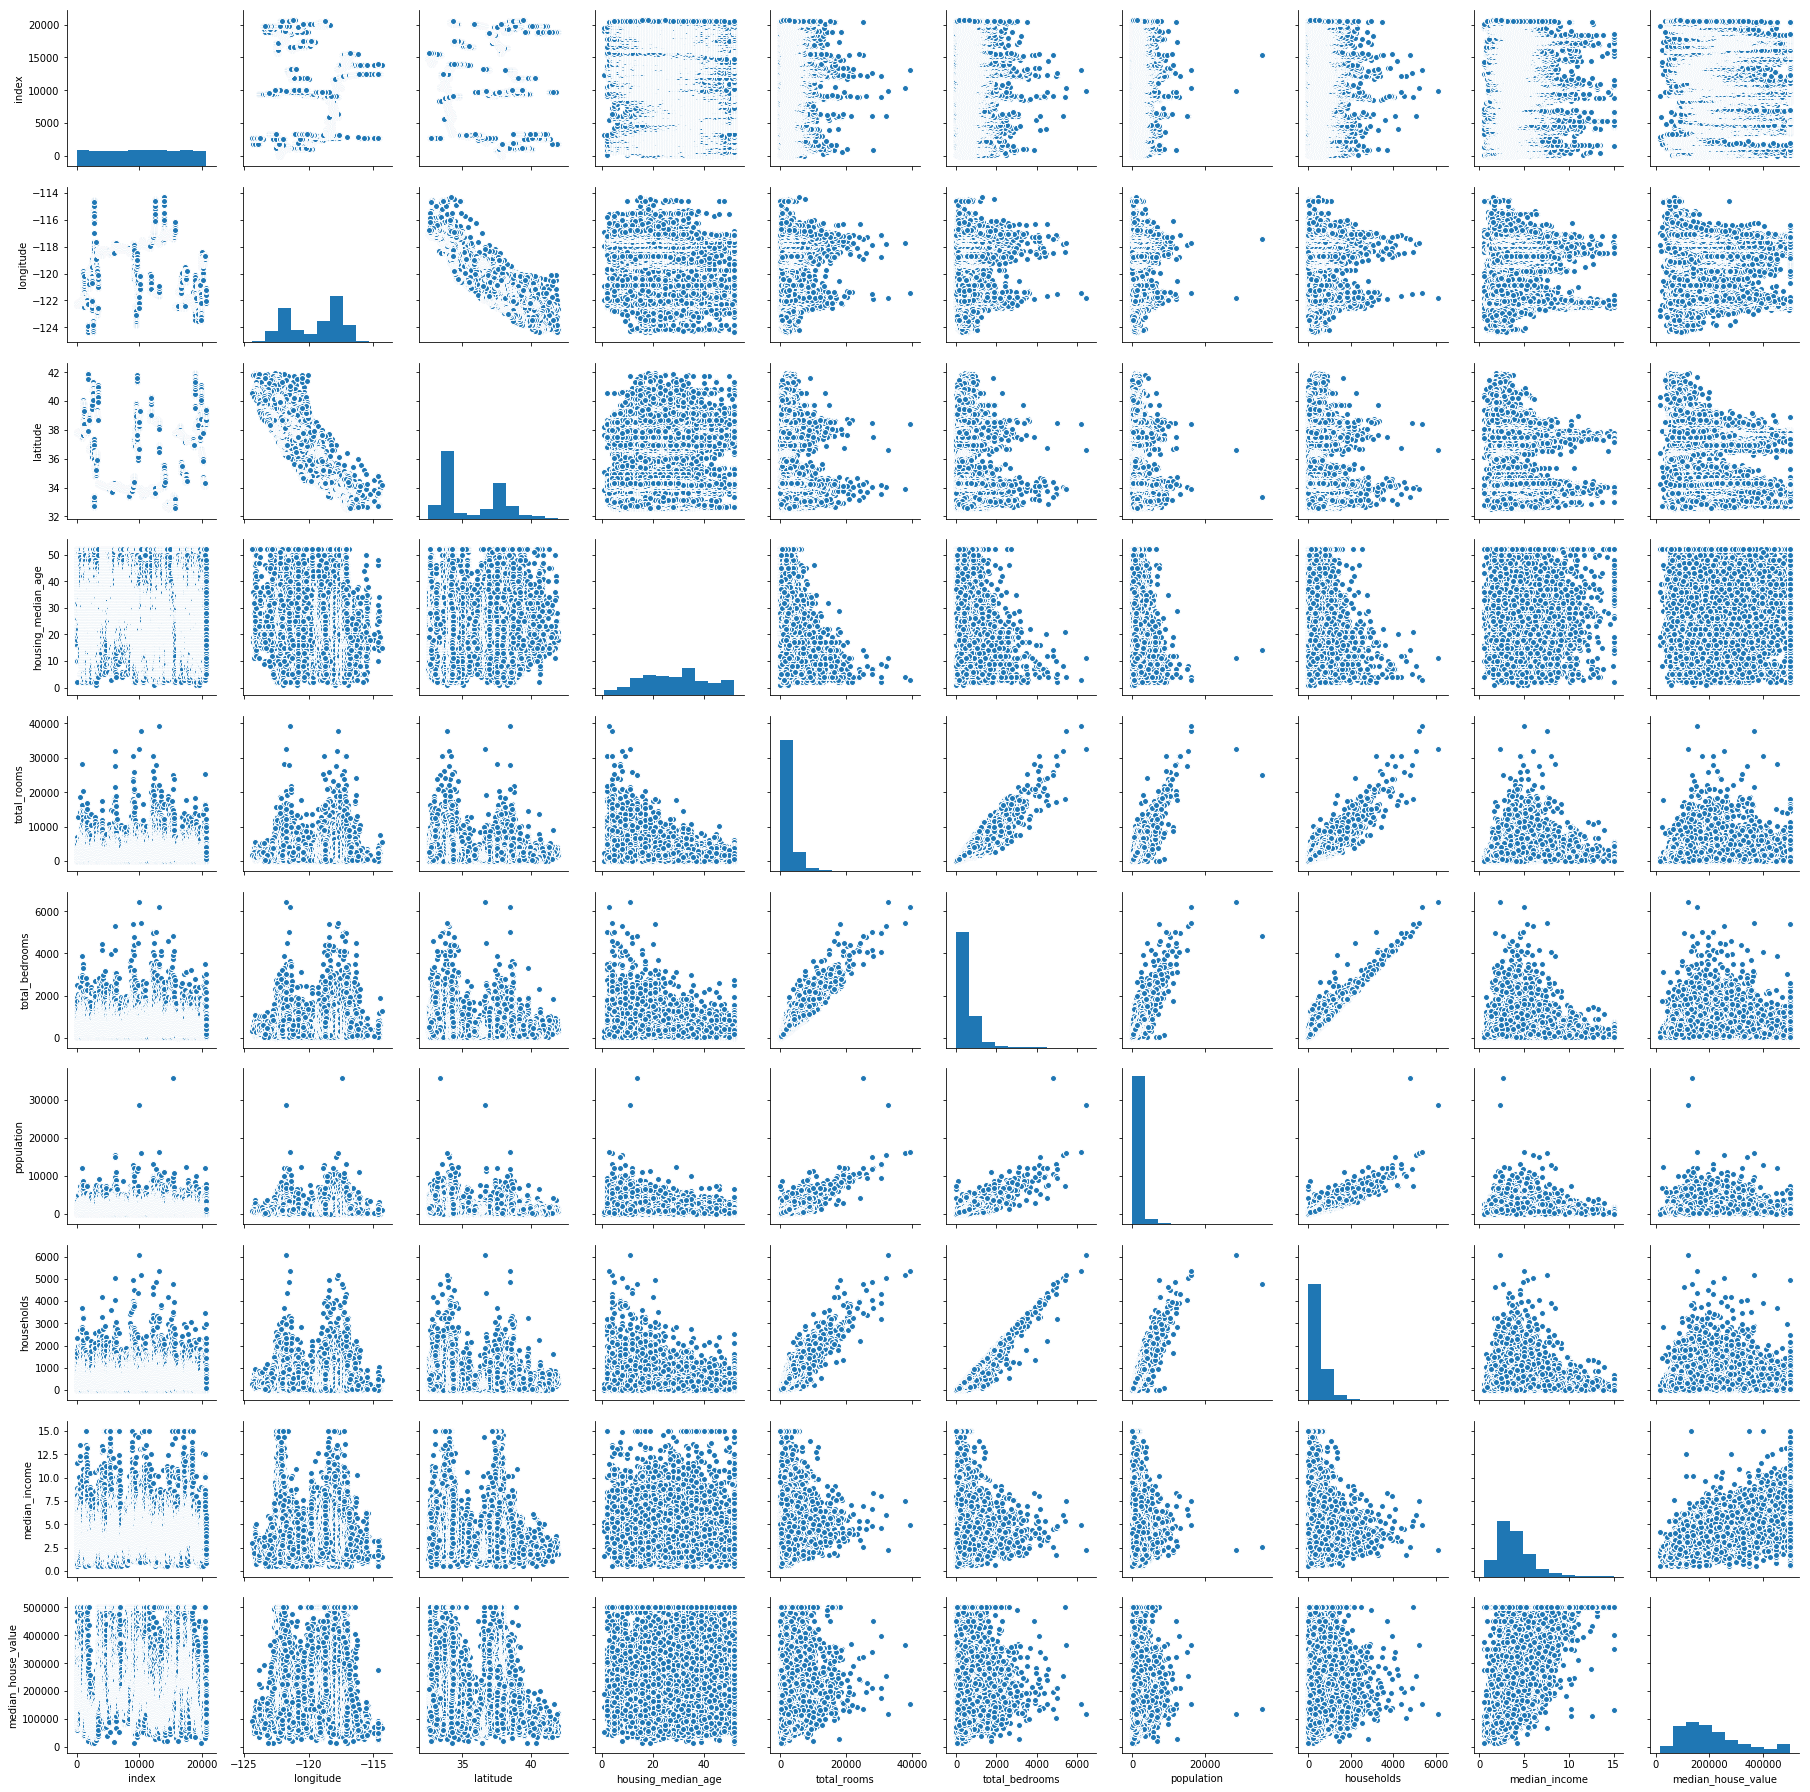

In [68]:
sns.pairplot(df)

C:\Users\Gobi.R\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


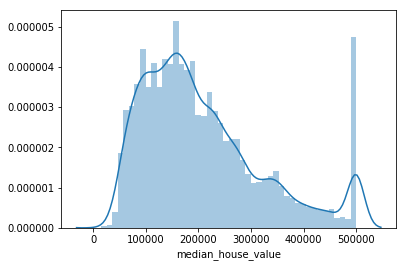

In [32]:
sns.distplot(df['median_house_value'])

In [10]:
s=df.corr()

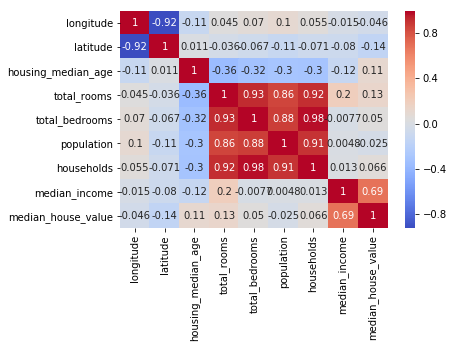

In [35]:
sns.heatmap(s, annot=True, cmap='coolwarm')

In [44]:
df.dropna(inplace=True)

In [45]:
X=df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']]

In [46]:
Y=df['median_house_value']

In [47]:
from sklearn.cross_validation import train_test_split

In [48]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.4, random_state=101)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lm=LinearRegression()

In [51]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
print(lm.intercept_)

-3602193.4934109114


In [54]:
lm.coef_

array([-4.28606442e+04, -4.24499866e+04,  1.11596294e+03, -8.85151971e+00,
        1.34406217e+02, -3.46895043e+01,  1.75394047e+01,  4.03422040e+04])

In [55]:
pd.DataFrame(lm.coef_, X.columns, columns=['coeff'])

,coeff
longitude,-42860.644192
latitude,-42449.986637
housing_median_age,1115.962944
total_rooms,-8.851520
total_bedrooms,134.406217
population,-34.689504
households,17.539405
median_income,40342.204015


In [56]:
from sklearn.datasets import load_boston

In [57]:
boston=load_boston()

In [58]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [59]:
#prediction
predictions=lm.predict(X_test)

In [60]:
Y_test

14561    237300.0
1571     386600.0
4201     176700.0
4670     250000.0
6251     163300.0
16551    155300.0
1950     128300.0
10270    162400.0
20403    274800.0
19739     81300.0
8086     212100.0
4937      95000.0
3809     186900.0
10938    154400.0
10169    500001.0
10117    184400.0
11624    159600.0
13917     65600.0
20158    375000.0
14664    166500.0
5438     500001.0
18670    289500.0
4495     153100.0
12766     88600.0
3164      57300.0
12264    130800.0
11367    271900.0
11985    142400.0
2222     155600.0
12805     66300.0
           ...   
13857    194100.0
18186    252400.0
10692     86900.0
7682     166800.0
12550    175000.0
2698      65800.0
6065     368300.0
1478     151000.0
1096      87500.0
126      295200.0
14446    326500.0
16722    205800.0
2977      70700.0
11023    165600.0
5026     122500.0
16662    247000.0
2489      55500.0
11869    111500.0
16820    236200.0
13753    121500.0
1420      87500.0
7924     170400.0
17563    223600.0
9020     356700.0
6581     5

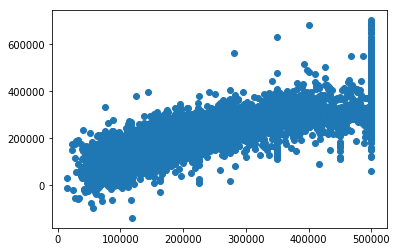

In [61]:
plt.scatter(Y_test,predictions)

C:\Users\Gobi.R\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


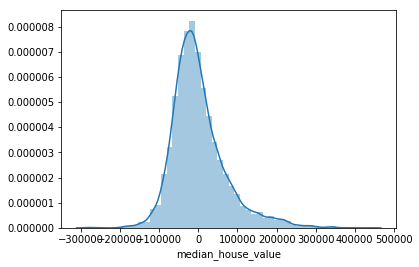

In [63]:
sns.distplot(Y_test-predictions)

In [64]:
from sklearn import metrics

In [65]:
metrics.mean_squared_error(Y_test, predictions)

4878459535.293809

In [66]:
np.sqrt(metrics.mean_squared_error(Y_test, predictions))

69845.97007196484